### Importing Libraries

Mounted at /content/drive


In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
import gensim
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from gensim.models import word2vec
import nltk
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing import text, sequence
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import json

Matplotlib is building the font cache; this may take a moment.


ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (C:\Users\gayat\anaconda3\lib\site-packages\keras\preprocessing\sequence.py)

## Loading the dataset

In [2]:
df = pd.read_csv('C:/Users/gayat/OneDrive/Desktop/print/emails')

print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/gayat/OneDrive/Desktop/print/emails'

In [ ]:
df.shape

(568454, 10)

In [ ]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
##Removing the Duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
#Check for the null values in each column
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
##Remove the NaN values from the dataset
df.isnull().sum()
df.dropna(how='any',inplace=True)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Score')

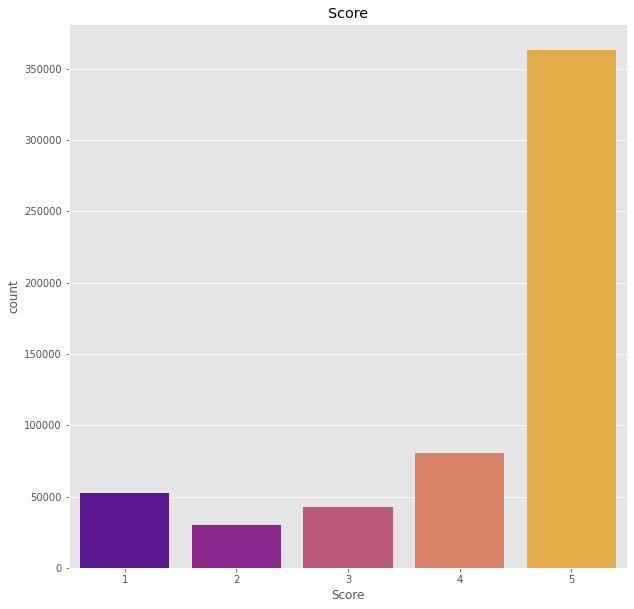

In [ ]:
import seaborn as sns
sns.countplot(df['Score'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Score')

In [ ]:
rating_df = pd.DataFrame(df, columns=['Score', 'Text'])

print(rating_df.shape)
rating_df.head()

(568411, 2)


,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [ ]:
rating_df['Score'].astype('category').value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [ ]:
dummies = pd.get_dummies(rating_df['Score'])
dummies.head()

,1,2,3,4,5
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,1


### Text Preprocessing

In [ ]:
## Lower Casing
rating_df['Text'] = rating_df['Text'].str.lower()
rating_df.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price. there was a wid...


In [ ]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

rating_df['Text'] = rating_df['Text'].apply(lambda text: remove_punctuation(text))
rating_df.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price there was a wide...


In [ ]:
## Removal of Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

rating_df['Text'] = rating_df['Text'].apply(lambda text: remove_stopwords(text))
rating_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Score,Text
0,5,bought several vitality canned dog food produc...
1,1,product arrived labeled jumbo salted peanutsth...
2,4,confection around centuries light pillowy citr...
3,2,looking secret ingredient robitussin believe f...
4,5,great taffy great price wide assortment yummy ...


In [ ]:
## Removal of urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

rating_df['Text'] = rating_df['Text'].apply(lambda text: remove_urls(text))
rating_df.head()

,Score,Text
0,5,bought several vitality canned dog food produc...
1,1,product arrived labeled jumbo salted peanutsth...
2,4,confection around centuries light pillowy citr...
3,2,looking secret ingredient robitussin believe f...
4,5,great taffy great price wide assortment yummy ...


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    rating_df['Text'], 
    dummies, 
    test_size=0.1, random_state=19
)

In [ ]:
def build_matrix(word_index, path):
    def get_coefs(word, *arr):
        return word, np.asarray(arr, dtype='float32')

    def load_embeddings(path):
        with open(path) as f:
            embedding_index = {}
            
            for line in tqdm(f):
                word, arr = get_coefs(*line.strip().split(' '))    
                if word in word_index:
                    embedding_index[word] = arr
            
        return embedding_index

    embedding_index = load_embeddings(path)
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    
    for word, i in tqdm(word_index.items()):
        try:
            embedding_matrix[i] = embedding_index[word]
        except KeyError:
            pass
    return embedding_matrix

In [ ]:
def build_model(embedding_matrix):
    words = Input(shape=(None,))
    x = Embedding(*embedding_matrix.shape, weights=[embedding_matrix], trainable=False)(words)
    x = SpatialDropout1D(0.3)(x)
    x = Bidirectional(LSTM(256, return_sequences=True))(x)
 
    hidden = concatenate([
        GlobalMaxPooling1D()(x),
        GlobalAveragePooling1D()(x),
    ])
    hidden = Dense(512, activation='relu')(hidden)
    
    result = Dense(5, activation='softmax')(hidden)
    
    model = Model(inputs=words, outputs=result)
    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

In [ ]:
%%time
CHARS_TO_REMOVE = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—'
tokenizer = text.Tokenizer(filters=CHARS_TO_REMOVE)
tokenizer.fit_on_texts(list(x_train) + list(x_test))

CPU times: user 31.1 s, sys: 280 ms, total: 31.4 s
Wall time: 31.6 s


In [ ]:
def build_model():
  model = build_model(embedding_matrix)
  model.summary()

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor='val_acc', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)
def fit():
 history = model.fit(
    x_train,
    y_train,
    batch_size=512,
    callbacks=[checkpoint],
    epochs=10,
    validation_split=0.1
)

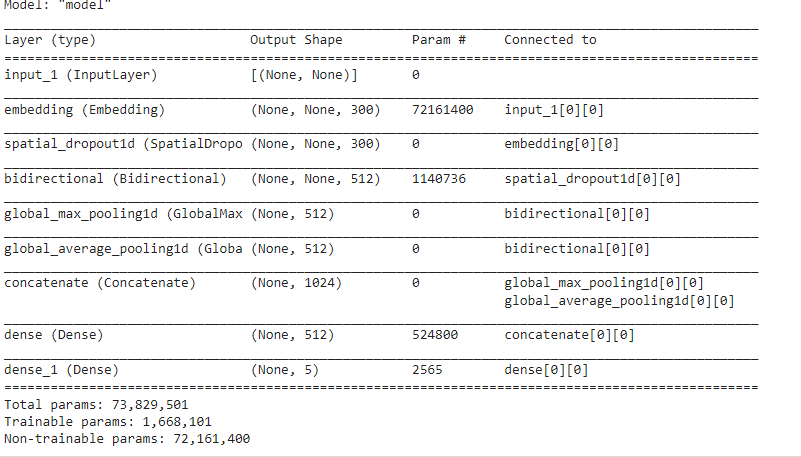

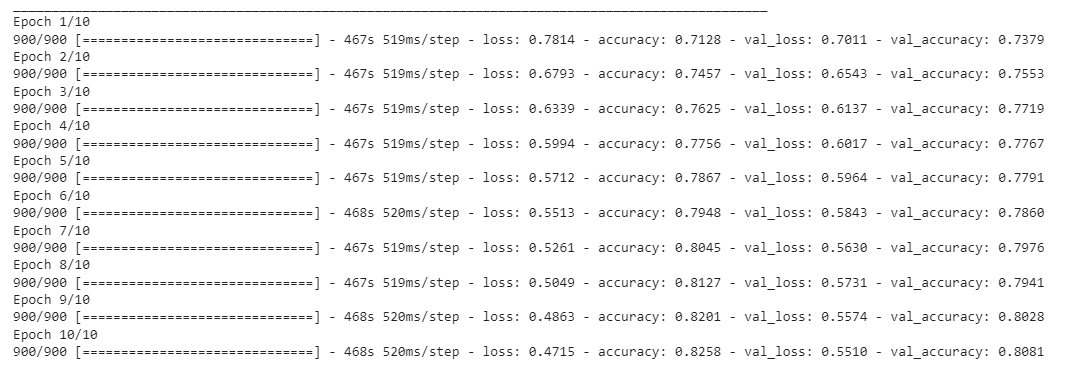